In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import scipy
from scipy.optimize import curve_fit
import seaborn as sns
from matplotlib import cm
import csv
import scipy.io as sio
import pandas as pd
from scipy.special import erf
import time
import torch
import os
import h5py

# plotting configuration
ratio = 1.7
figure_len, figure_width = 24*ratio, 18*ratio
title_font_size = 12*ratio
font_size_1, font_size_2 = 9*ratio, 9*ratio
legend_size = 18*ratio
line_width, tick_len = ratio, 4*ratio
marker_size = 5*ratio
plot_line_width = 2*ratio
hfont = {'fontname': 'Arial'}
marker_edge_width = 4
pal = sns.color_palette("deep")
sns.set(style='ticks')

### Fig. 3C - distribution of the real part of the leading eigenvalue for distinct subnetworks

Text(0.5, 1.11, 'Distribution of the real part of the leading eigenvalue')

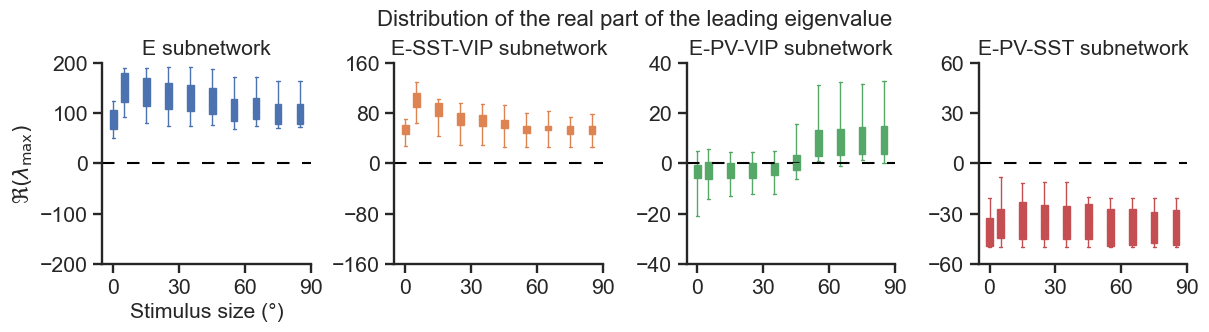

In [2]:
max_eig_mat = sio.loadmat('data/max_eig.mat')['max_eig']

l_stimulus = np.asarray([0, 5, 15, 25, 35, 45, 55, 65, 75, 85])

fig, axes = plt.subplots(1, 4, figsize=(13*0.9, 3*0.9))
fig.tight_layout()

for i in range(4):  # groups
    idx = i
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].spines['bottom'].set_visible(True)
    axes[idx].spines['left'].set_visible(True)
    for axis in ['top', 'bottom', 'left', 'right']:
        axes[idx].spines[axis].set_linewidth(line_width)
    axes[idx].tick_params(width=line_width, length=tick_len)
    
    for j in range(10):  # stimuli
        bp = axes[idx].boxplot(
            max_eig_mat[i+1, :, j],
            positions=[l_stimulus[j]],
            widths=3,
            showfliers=True,
            patch_artist=True,
            whis=[0, 100]
        )
        
        for box in bp['boxes']:
            box.set_facecolor(pal[i])
            box.set_alpha(1)          # transparency
            box.set_edgecolor(pal[i])  # outline
            
        for element in ['whiskers', 'caps', 'medians']:
            plt.setp(bp[element], color=pal[i], linewidth=1)

    axes[idx].set_xlim(-5, 90)
    axes[idx].set_xticks([0, 30, 60, 90], [0, 30, 60, 90])
    
    if i == 0:
        axes[idx].set_ylim(-200, 200)
        axes[idx].set_yticks([-200, -100, 0, 100, 200])
    elif i == 1:
        axes[idx].set_ylim(-160, 160)
        axes[idx].set_yticks([-160, -80, 0, 80, 160])
    elif i == 2:
        axes[idx].set_ylim(-40, 40)
        axes[idx].set_yticks([-40, -20, 0, 20, 40])
    else:
        axes[idx].set_ylim(-60, 60)
        axes[idx].set_yticks([-60, -30, 0, 30, 60])

    if idx == 0:
        axes[idx].set_xlabel("Stimulus size (°)", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
        axes[idx].set_ylabel(r"$\Re(\lambda_{\max})$", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
    
    if idx == 0:
        axes[idx].set_title('E subnetwork', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})
    elif idx == 1:
        axes[idx].set_title('E-SST-VIP subnetwork', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})
    elif idx == 2:
        axes[idx].set_title('E-PV-VIP subnetwork', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})
    else:
        axes[idx].set_title('E-PV-SST subnetwork', fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})

    axes[idx].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size

    for label in (axes[idx].get_xticklabels() + axes[idx].get_yticklabels()):
        label.set_fontname('Arial')

    axes[idx].axhline(y=0, color='black', linestyle=(0, (6, 6, 6, 6)))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
title_font_size = 16
fig.suptitle('Distribution of the real part of the leading eigenvalue', y=1.11, fontsize=title_font_size, fontname='Arial')
# fig.savefig('paper_figures/paper_png/Fig_eigenvalue_distribution.png', bbox_inches='tight', dpi=300)

### Fig. S9 - plot the real part of the leading eigenvalue of the Jacobian of the E-PV-VIP subnetwork - individual models

Text(0.5, 1.06, 'Real part of the leading eigenvalue of the Jacobian of the E-PV-VIP subnetwork - individual models')

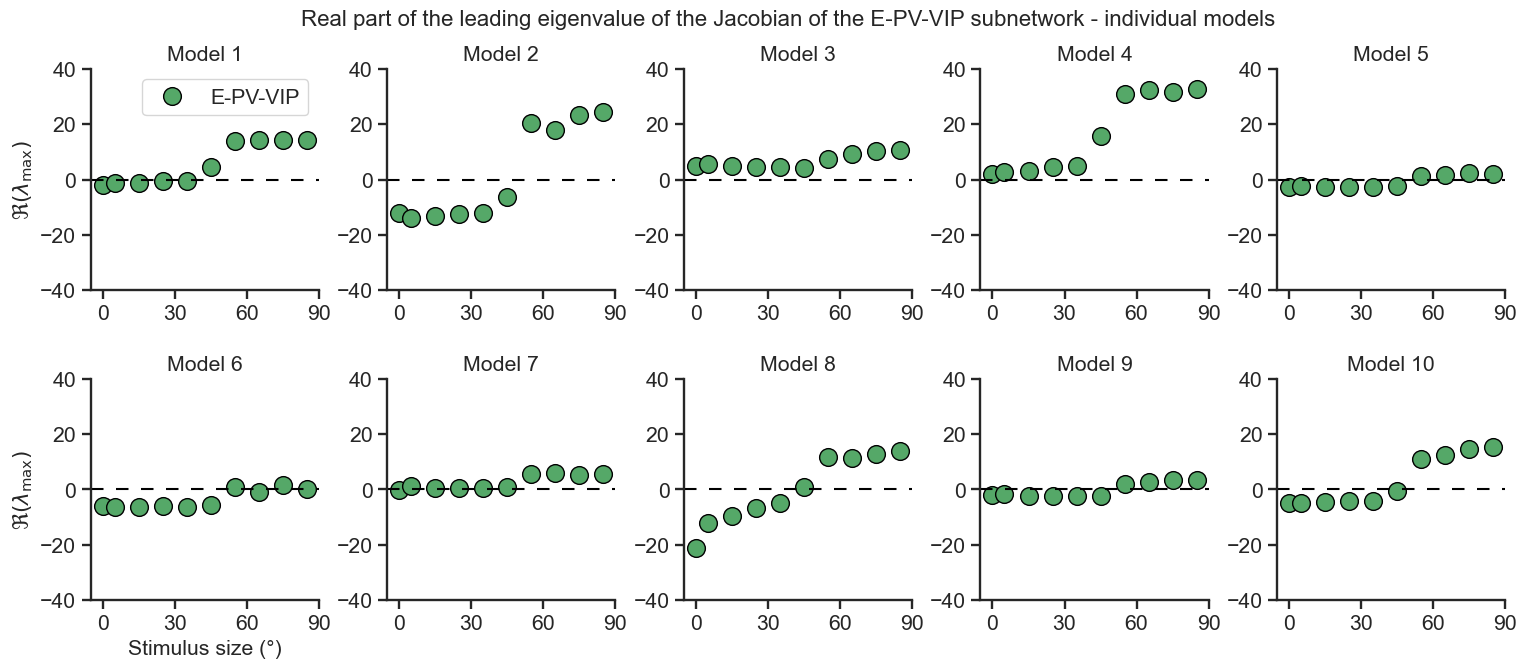

In [3]:
max_eig_mat = sio.loadmat('data/max_eig.mat')['max_eig']
l_config_labels = ['E', 'E-SST-VIP', 'E-PV-VIP', 'E-PV-SST']
l_stimulus = [0, 5, 15, 25, 35, 45, 55, 65, 75, 85]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.tight_layout()

for i in range(2): # four configurations
    for j in range(5): # four models
        idx1, idx2 = i, j
        axes[idx1, idx2].spines['top'].set_visible(False)
        axes[idx1, idx2].spines['right'].set_visible(False)
        axes[idx1, idx2].spines['bottom'].set_visible(True)
        axes[idx1, idx2].spines['left'].set_visible(True)
        for axis in ['top', 'bottom', 'left', 'right']:
            axes[idx1, idx2].spines[axis].set_linewidth(line_width)
        axes[idx1, idx2].tick_params(width=line_width, length=tick_len)
        
        for k in range(len(l_stimulus)):
            axes[idx1, idx2].plot(l_stimulus[k], max_eig_mat[3, i*5+j, k], linestyle='none', marker='o',
             markeredgewidth=1, markersize=marker_size * 1.5,
             markeredgecolor='black', markerfacecolor=pal[2])

        axes[idx1, idx2].axhline(y=0, color='black', linestyle=(0, (6, 6, 6, 6)))

        axes[idx1, idx2].set_ylim(-40, 40)
        axes[idx1, idx2].set_yticks([-40, -20, 0, 20, 40])
    
        axes[idx1, idx2].set_xlim(-5, 90)
        axes[idx1, idx2].set_xticks([0, 30, 60, 90], [0, 30, 60, 90])
        
        axes[idx1, idx2].set_title('Model ' + str(i*5+j+1), fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})

        if idx2 == 0:
            axes[idx1, idx2].set_ylabel(r"$\Re(\lambda_{\max})$", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
        
        if idx1 == 1 and idx2 ==0:
            axes[idx1, idx2].set_xlabel("Stimulus size (°)", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
        
        if idx1 == 0 and idx2 ==0:
            axes[idx1, idx2].legend([l_config_labels[2]], loc='best', prop={"family": "Arial", 'size': font_size_1})
            
        axes[idx1, idx2].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size

        for label in (axes[idx1, idx2].get_xticklabels() + axes[idx1, idx2].get_yticklabels()):
            label.set_fontname('Arial')
            
fig.subplots_adjust(hspace=0.4, wspace=0.3)
title_font_size = 16
fig.suptitle('Real part of the leading eigenvalue of the Jacobian of the E-PV-VIP subnetwork - individual models', y=1.06, fontsize=title_font_size, fontname='Arial')
# fig.savefig('paper_figures/paper_png/Fig_eigenvalue_Jacobian_subnetwork_individual_models.png', bbox_inches='tight', dpi=300)
# fig.savefig('paper_figures/paper_pdf/Fig_eigenvalue_Jacobian_subnetwork_individual_models.pdf', bbox_inches='tight')

### Fig. S17 and S18 - the number of unstable modes vs. the number of paradoxically responding modes

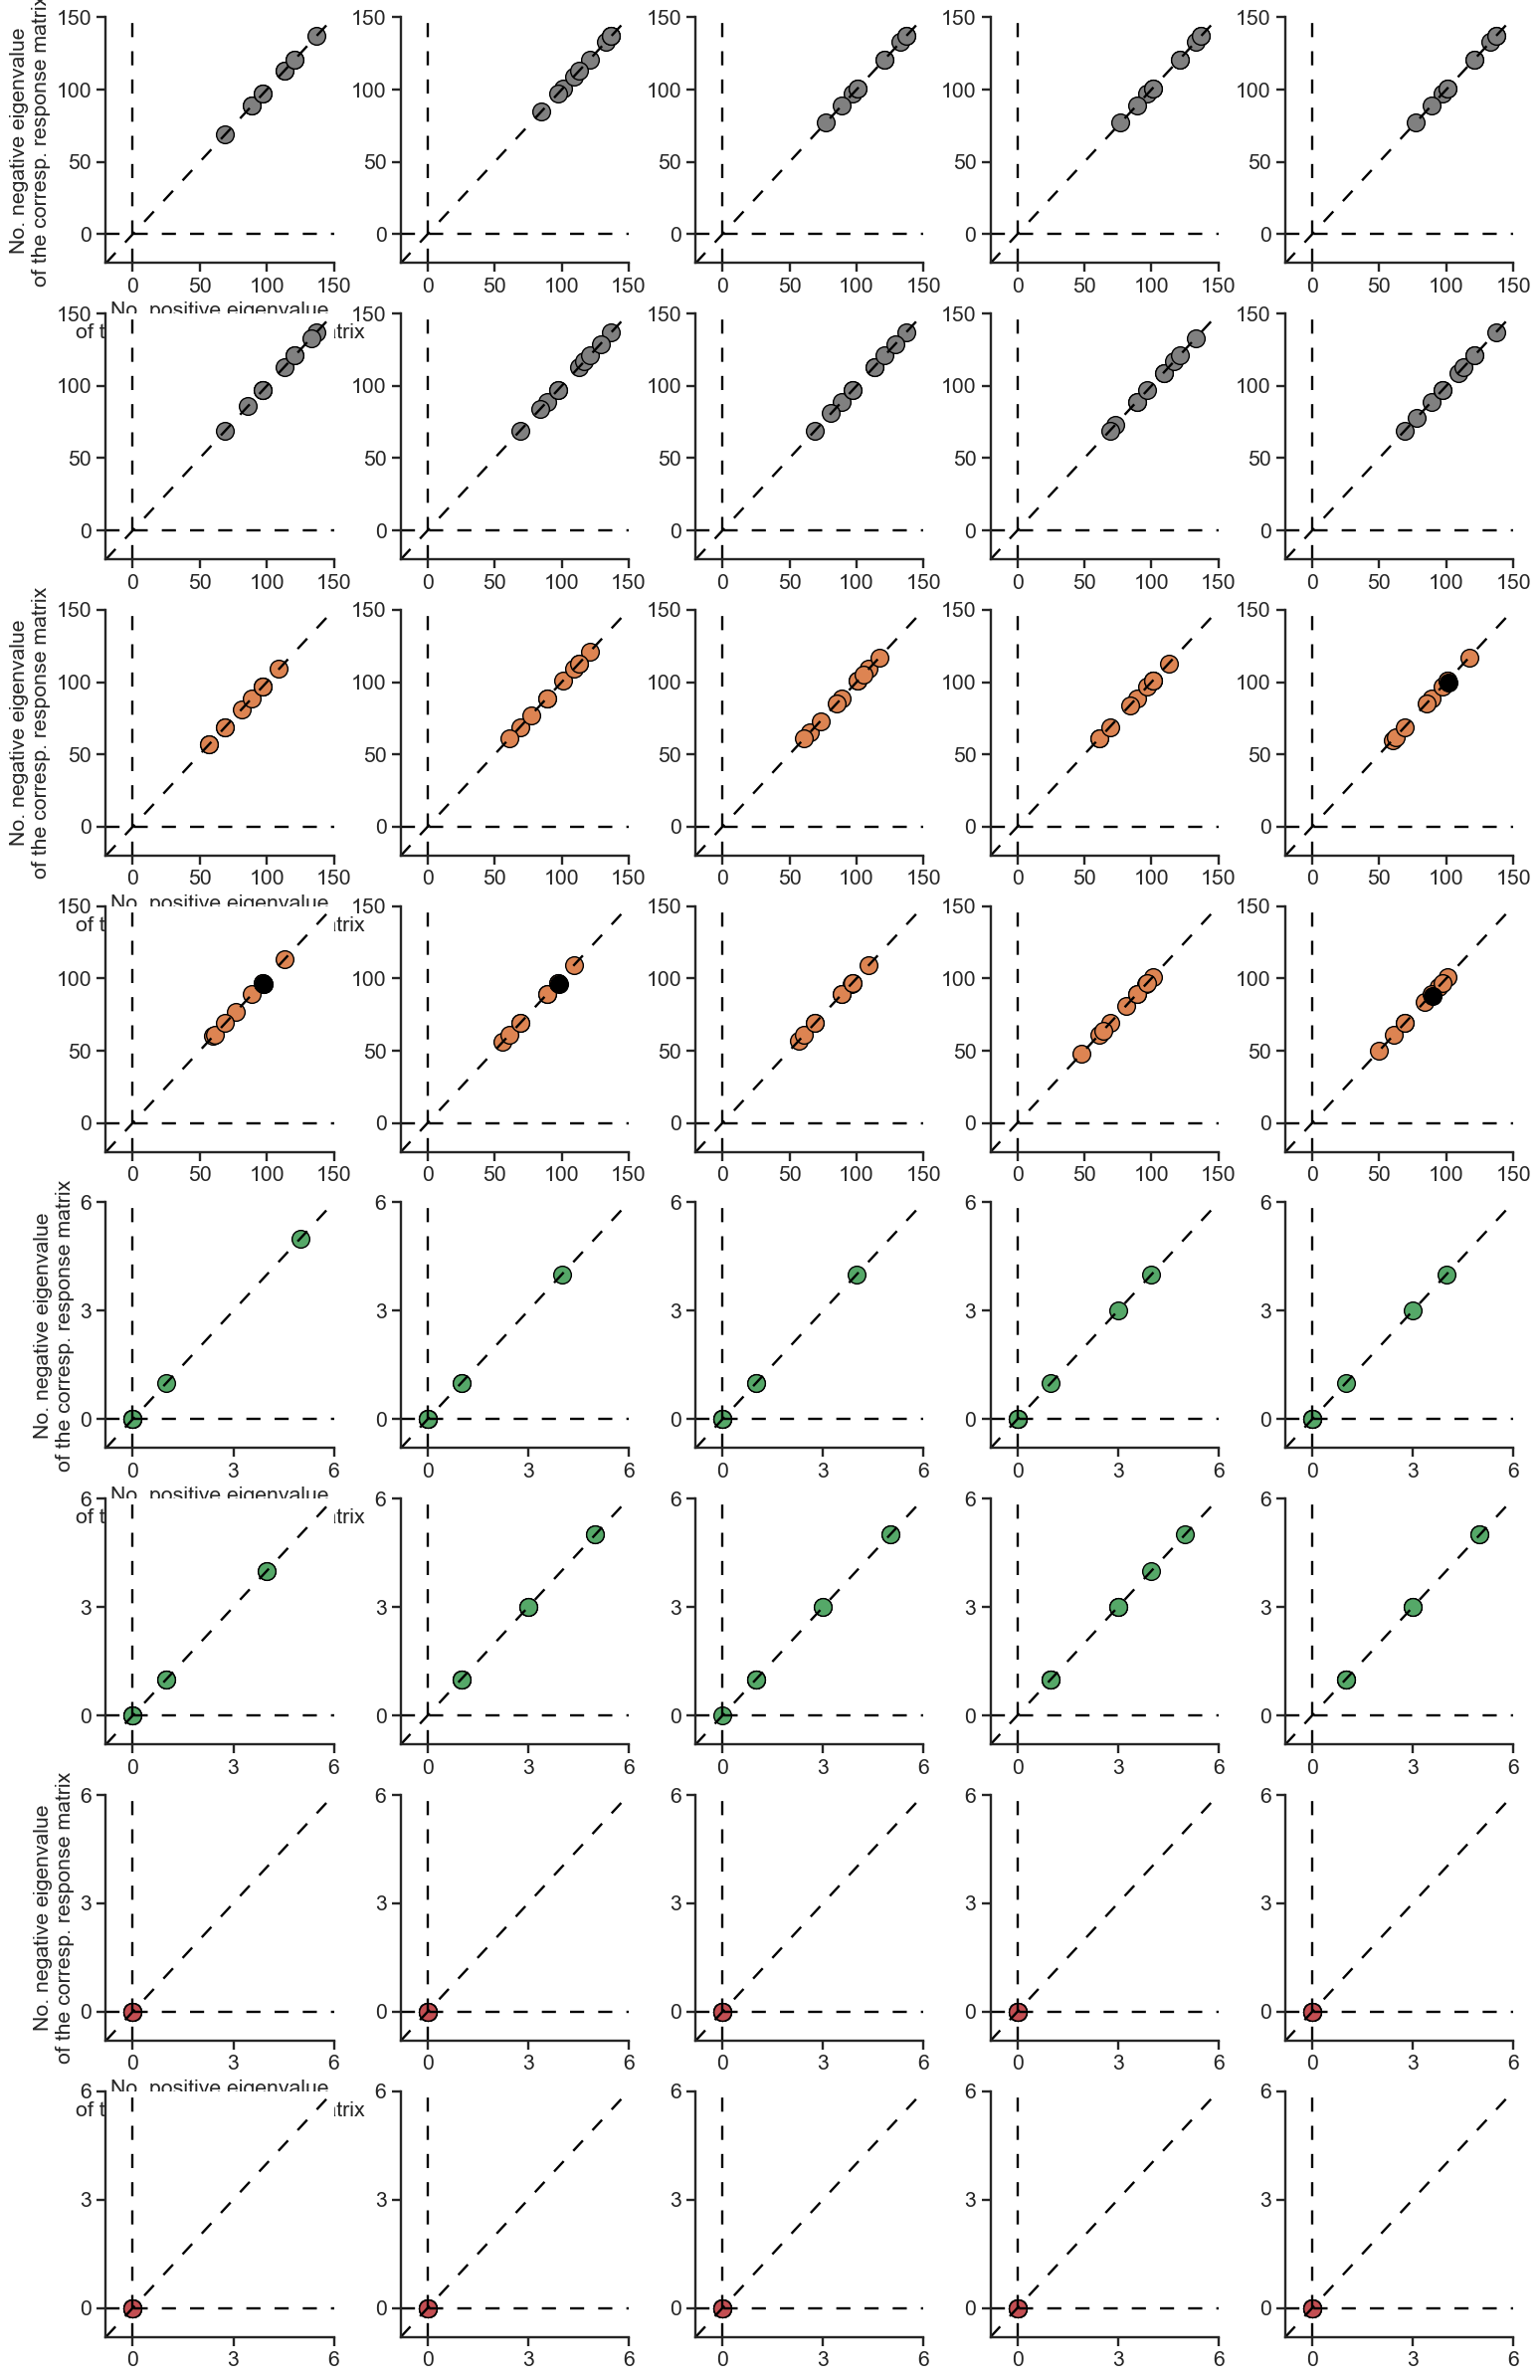

In [4]:
n_positive_eig_Jac_mat = sio.loadmat('data/n_positive_real_eig_Jac_mat.mat')['n_positive_real_eig']

fig, axes = plt.subplots(8, 5, figsize=(15, 24))
fig.tight_layout()

l_s_manipulation = ['Inh_part', 'PV_part', 'SST_part', 'VIP_part']
for s_manipulation_idx in range(len(l_s_manipulation)):
    s_manipulation = l_s_manipulation[s_manipulation_idx]
    n_neg_eig_val_resp_mat = sio.loadmat('data/n_neg_eig_val_rsp_' + s_manipulation + '.mat')['n_neg_eig_val']
    
    for i in range(10): # 10 stimulus size
        
        idx = s_manipulation_idx*10 + i
        
        idx1, idx2 = idx // 5, idx % 5

        axes[idx1, idx2].spines['top'].set_visible(False)
        axes[idx1, idx2].spines['right'].set_visible(False)
        axes[idx1, idx2].spines['bottom'].set_visible(True)
        axes[idx1, idx2].spines['left'].set_visible(True)
        for axis in ['top', 'bottom', 'left', 'right']:
            axes[idx1, idx2].spines[axis].set_linewidth(line_width)
        axes[idx1, idx2].tick_params(width=line_width, length=tick_len)
        
        for j in range(10): # 10 models
            
            if s_manipulation_idx == 0:
                if n_positive_eig_Jac_mat[s_manipulation_idx+1, j, i] - n_neg_eig_val_resp_mat[j, i] == 0:
                    axes[idx1, idx2].plot(n_positive_eig_Jac_mat[s_manipulation_idx+1, j, i], n_neg_eig_val_resp_mat[j, i], linestyle='none', marker='o',
                         markeredgewidth=1, markersize=marker_size * 1.5,
                         markeredgecolor='black', markerfacecolor='gray', zorder=2)
                else:
                    axes[idx1, idx2].plot(n_positive_eig_Jac_mat[s_manipulation_idx+1, j, i], n_neg_eig_val_resp_mat[j, i], linestyle='none', marker='o',
                     markeredgewidth=1, markersize=marker_size * 1.5,
                     markeredgecolor='black', markerfacecolor='black', zorder=3)
            else:
                if n_positive_eig_Jac_mat[s_manipulation_idx+1, j, i] - n_neg_eig_val_resp_mat[j, i] == 0:
                    axes[idx1, idx2].plot(n_positive_eig_Jac_mat[s_manipulation_idx+1, j, i], n_neg_eig_val_resp_mat[j, i], linestyle='none', marker='o',
                         markeredgewidth=1, markersize=marker_size * 1.5,
                         markeredgecolor='black', markerfacecolor=pal[s_manipulation_idx], zorder=2)
                else:
                    axes[idx1, idx2].plot(n_positive_eig_Jac_mat[s_manipulation_idx+1, j, i], n_neg_eig_val_resp_mat[j, i], linestyle='none', marker='o',
                     markeredgewidth=1, markersize=marker_size * 1.5,
                     markeredgecolor='black', markerfacecolor='black', zorder=3)
        
        scaling_factor = 0.5
        if s_manipulation_idx == 0:
            axes[idx1, idx2].set_xlim(-20, 150)
            axes[idx1, idx2].set_xticks([0, 50, 100, 150])
            axes[idx1, idx2].set_ylim(-20, 150)
            axes[idx1, idx2].set_yticks([0, 50, 100, 150])
            axes[idx1, idx2].axvline(x=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].axhline(y=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].plot([-20, 150], [-20, 150], linewidth=plot_line_width*scaling_factor, color='black', linestyle=(0, (6, 6, 6, 6)))
            
        elif s_manipulation_idx == 1:
            axes[idx1, idx2].set_xlim(-20, 150)
            axes[idx1, idx2].set_xticks([0, 50, 100, 150])
            axes[idx1, idx2].set_ylim(-20, 150)
            axes[idx1, idx2].set_yticks([0, 50, 100, 150])
            axes[idx1, idx2].axvline(x=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].axhline(y=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].plot([-20, 150], [-20, 150], linewidth=plot_line_width*scaling_factor, color='black', linestyle=(0, (6, 6, 6, 6)))
            
        elif s_manipulation_idx == 2:
            axes[idx1, idx2].set_xlim(-0.8, 6)
            axes[idx1, idx2].set_xticks([0, 3, 6])
            axes[idx1, idx2].set_ylim(-0.8, 6)
            axes[idx1, idx2].set_yticks([0, 3, 6])
            axes[idx1, idx2].axvline(x=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].axhline(y=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].plot([-0.8, 6], [-0.8, 6], linewidth=plot_line_width*scaling_factor, color='black', linestyle=(0, (6, 6, 6, 6)))
            
        else:
            axes[idx1, idx2].set_xlim(-0.8, 6)
            axes[idx1, idx2].set_xticks([0, 3, 6])
            axes[idx1, idx2].set_ylim(-0.8, 6)
            axes[idx1, idx2].set_yticks([0, 3, 6])
            axes[idx1, idx2].axvline(x=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].axhline(y=0, linewidth=plot_line_width*scaling_factor, color='black',linestyle=(0, (6, 6, 6, 6)))
            axes[idx1, idx2].plot([-0.8, 6], [-0.8, 6], linewidth=plot_line_width*scaling_factor, color='black', linestyle=(0, (6, 6, 6, 6)))
        
        
        if idx2 == 0 and (idx1==0 or idx1==2 or idx1==4 or idx1==6):
            axes[idx1, idx2].set_xlabel("No. positive eigenvalue\nof the corresp. Jacobian matrix", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})
            axes[idx1, idx2].set_ylabel("No. negative eigenvalue\nof the corresp. response matrix", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})        
        
        axes[idx1, idx2].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size

        for label in (axes[idx1, idx2].get_xticklabels() + axes[idx1, idx2].get_yticklabels()):
            label.set_fontname('Arial')
            
# fig.subplots_adjust(hspace=0.4, wspace=0.3)
# fig.savefig('paper_figures/paper_pdf/Fig_eigenvalue_number_comparison.pdf', bbox_inches='tight')

### Fig. S10 - real part of the smallest eigenvalue of the response matrix - individual models

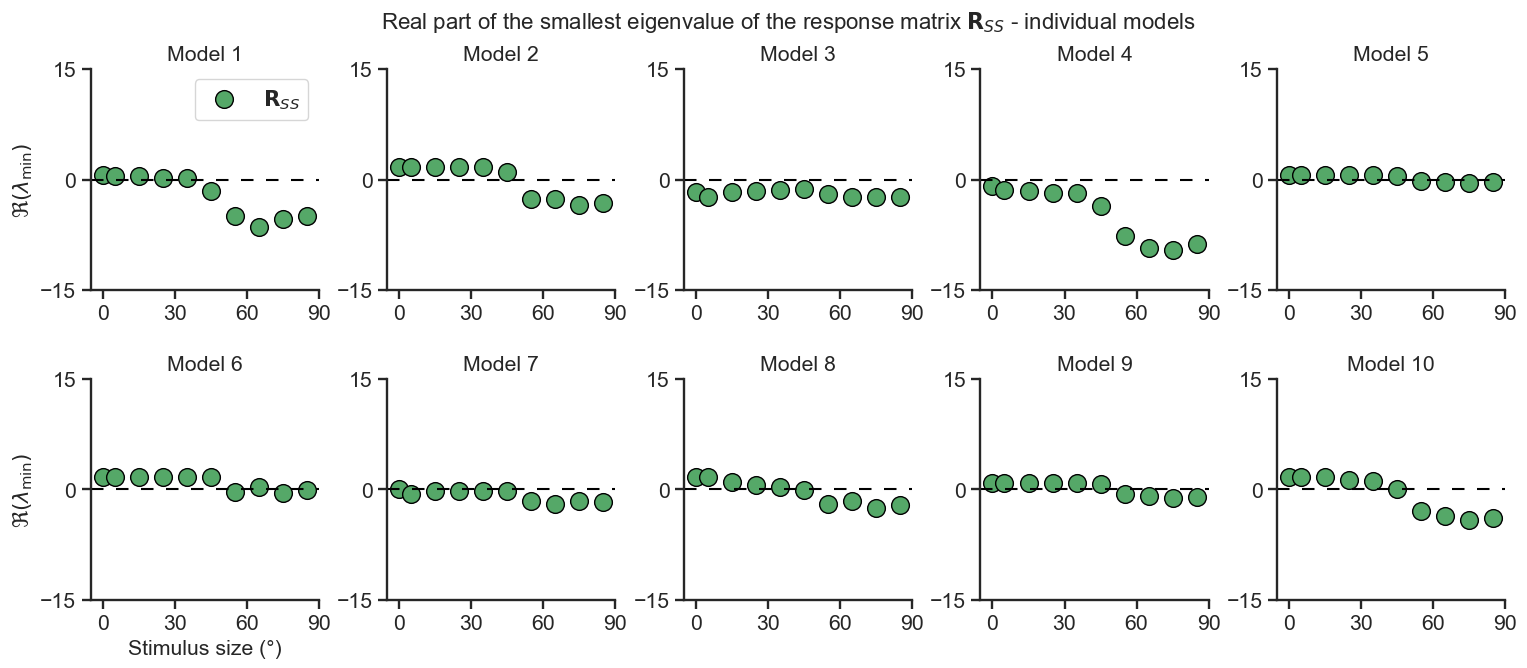

In [5]:
l_s_manipulation = ['SST_part']

l_config_labels = [r"$\mathbf{R}_{SS}$"]
l_stimulus = [0, 5, 15, 25, 35, 45, 55, 65, 75, 85]

for i in range(1): # four configurations
    s_manipulation = l_s_manipulation[i]
    min_eig_val_rsp_mat = sio.loadmat('data/min_eig_val_rsp_' + s_manipulation + '.mat')['min_eig_val']
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.tight_layout()
    
    for j in range(2):
        for k in range(5):
            idx1, idx2 = j, k
            axes[idx1, idx2].spines['top'].set_visible(False)
            axes[idx1, idx2].spines['right'].set_visible(False)
            axes[idx1, idx2].spines['bottom'].set_visible(True)
            axes[idx1, idx2].spines['left'].set_visible(True)
            for axis in ['top', 'bottom', 'left', 'right']:
                axes[idx1, idx2].spines[axis].set_linewidth(line_width)
            axes[idx1, idx2].tick_params(width=line_width, length=tick_len)

            for m in range(len(l_stimulus)):
                axes[idx1, idx2].plot(l_stimulus[m], min_eig_val_rsp_mat[j*5+k, m], linestyle='none', marker='o',
                     markeredgewidth=1, markersize=marker_size * 1.5,
                     markeredgecolor='black', markerfacecolor=pal[2])# , linewidth=plot_line_width, color=pal[n])#, alpha=l_alpha[n])

            axes[idx1, idx2].axhline(y=0, color='black', linestyle=(0, (6, 6, 6, 6)))

            axes[idx1, idx2].set_ylim(-15, 15)
            axes[idx1, idx2].set_yticks([-15, 0, 15])

            axes[idx1, idx2].set_xlim(-5, 90)
            axes[idx1, idx2].set_xticks([0, 30, 60, 90], [0, 30, 60, 90])

            axes[idx1, idx2].set_title('Model ' + str(j*5+k+1), fontdict = {'fontname': 'Arial', 'fontsize': font_size_1})

            if idx1 == 0 and idx2 == 0:
                axes[idx1, idx2].legend([l_config_labels[i]], loc='best', prop={"family": "Arial", 'size': font_size_1})

            if idx1 == 1 and idx2 == 0:
                axes[idx1, idx2].set_xlabel("Stimulus size (°)", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})

            if idx2 == 0:
                axes[idx1, idx2].set_ylabel(r"$\Re(\lambda_{\min})$", fontdict={'fontname': 'Arial', 'fontsize': font_size_1})

            axes[idx1, idx2].tick_params(axis='both', which='major', labelsize=font_size_1)  # Customize tick label font size

            for label in (axes[idx1, idx2].get_xticklabels() + axes[idx1, idx2].get_yticklabels()):
                label.set_fontname('Arial')
            
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    title_font_size = 16
    fig.suptitle('Real part of the smallest eigenvalue of the response matrix ' + l_config_labels[i] + ' - individual models', y=1.06, fontsize=title_font_size, fontname='Arial')
    # fig.savefig('paper_figures/paper_png/Fig_eigenvalue_response_matrix_individual_models_' + s_manipulation + '.png', bbox_inches='tight', dpi=300)
    # fig.savefig('paper_figures/paper_pdf/Fig_eigenvalue_response_matrix_individual_models_' + s_manipulation + '.pdf', bbox_inches='tight')

### Fig. S11 - components of the eigenvector corresponding to the smallest eigenvalue of the response matrix

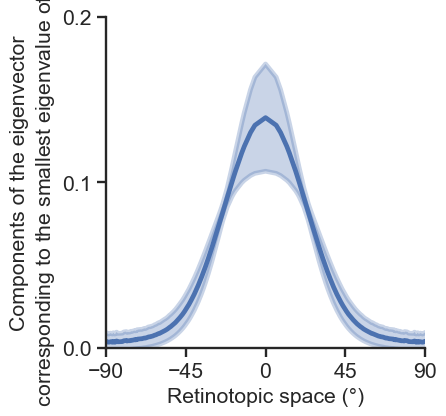

In [6]:
def calc_distance(i, j):
    """calculate the distance between two neurons,
        i and j are the indices of two neurons, i and j are from 0 to N*N-1 (31*30),
        x1 and y1 are the coordinate for the first neuron, x1 and y1 are from 0 to 30.
    """
    x1, y1 = divmod(i, N)
    x2, y2 = divmod(j, N)

    xd = np.minimum(np.abs(x1 - x2), N - np.abs(x1 - x2))
    yd = np.minimum(np.abs(y1 - y2), N - np.abs(y1 - y2))
    return np.sqrt(xd**2 + yd**2)

# network setup
N = 30 # N * N units for each cell type
center = int(((N+1)*N)/2)

patterned_perturbation_mat = sio.loadmat('data/min_eig_vec_rsp_SST_part.mat')['min_eig_vec']

eigenmode_mat = np.ones((239, 10)) * np.nan

for i in range(10):
    
    patterned_perturbation = patterned_perturbation_mat[i, 6, :]
    patterned_perturbation_reshaped = patterned_perturbation.reshape(30, 30)
    
    distances_to_center = np.array([calc_distance(i, center) for i in range(N * N)]) # calculate the distance between every point in the 2D grid and the center
    sorted_distance_indices = np.argsort(distances_to_center) # indices of the sorted distance in the original array
    sorted_distances = distances_to_center[sorted_distance_indices] # the sorted distances
    sorted_distances_degree = sorted_distances*6 # the sorted distances in degree

    sorted_distances_degree = np.asarray(sorted_distances_degree)  # your input array
    unique_sorted_distances_degree, unique_indices = np.unique(sorted_distances_degree, return_index=True)

    # print(sorted_distance_indices.shape)
    sorted_perturbation = patterned_perturbation[sorted_distance_indices]
    sorted_perturbation_unique = sorted_perturbation[unique_indices]

    unique_sorted_distances_degree_left = -unique_sorted_distances_degree[::-1]
    unique_sorted_distances_degree_total = list(unique_sorted_distances_degree_left[:-1]) + list(unique_sorted_distances_degree)

    sorted_perturbation_unique_left = sorted_perturbation_unique[::-1]
    sorted_perturbation_unique_total = list(sorted_perturbation_unique_left[:-1]) + list(sorted_perturbation_unique)

    if sorted_perturbation_unique_total[120] < 0:
        eigenmode_mat[:, i] = -np.asarray(sorted_perturbation_unique_total)
    else:
        eigenmode_mat[:, i] = np.asarray(sorted_perturbation_unique_total)

eigenmode_std = np.std(eigenmode_mat, axis=1)

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
fig.tight_layout()

# Spine visibility
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(True)
axes.spines['left'].set_visible(True)

# Spine width
for axis in ['top', 'bottom', 'left', 'right']:
    axes.spines[axis].set_linewidth(line_width)

# Tick params (spine ticks)
axes.tick_params(width=line_width, length=tick_len)

axes.plot(
    unique_sorted_distances_degree_total,
    np.mean(eigenmode_mat, axis=1),
    color=pal[0],
    linewidth=plot_line_width
)

axes.fill_between(unique_sorted_distances_degree_total, np.mean(eigenmode_mat, axis=1) - eigenmode_std, np.mean(eigenmode_mat, axis=1) + eigenmode_std, linewidth=plot_line_width, color=pal[0], alpha=0.3)

# Labels
axes.set_xlabel(
    'Retinotopic space (°)',
    fontdict={'fontname': 'Arial', 'fontsize': font_size_1}
)

axes.set_ylabel(
    'Components of the eigenvector\n'
    r' corresponding to the smallest eigenvalue of $\mathbf{R}_{SS}$',
    fontdict={'fontname': 'Arial', 'fontsize': font_size_1}
)

# Limits and ticks
axes.set_xlim(-90, 90)
axes.set_ylim(0, 0.2)

axes.set_xticks([-90, -45, 0, 45, 90])
axes.set_yticks([0, 0.1, 0.2])

axes.tick_params(axis='both', which='major', labelsize=font_size_1)
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontname('Arial')
    
# axes.set_title('Stimulus size 55°', y=1.06, fontsize=title_font_size, fontname='Arial')

# fig.savefig('paper_figures/paper_png/Fig_eigenmode.png', bbox_inches='tight', dpi=300)
# fig.subplots_adjust(hspace=0.4, wspace=0.3)
# fig.savefig('paper_figures/paper_pdf/Fig_eigenmode.pdf', dpi=300)